# 3.8 多层感知机
深度学习主要关注多层模型，接下来以多层感知机为例，介绍多层神经网络的概念

## 3.8.1 隐藏层
多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。下图展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。
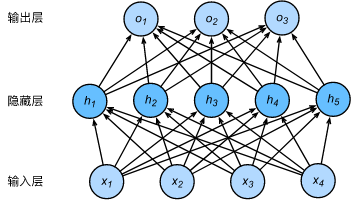
输入和输出个数分别是4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit），由于输入层不涉及计算，图中的多层感知机的层数为2。由图可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

# 3.8.2 激活函数
全连接层只对数据做仿射变换，而多个仿射变换的叠加仍然是一个仿射变换，解决问题的方法是引入非线性函数做变换，这个非线性函数被称为激活函数，下面介绍几个常用的激活函数

### 3.8.2.1 ReLU函数
$$ReLU(x)=max(x,0)$$
$$$$
ReLU函数只保留正数元素，并将负数元素清零

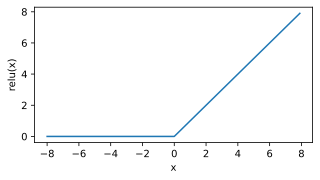

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')
    

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数导数为1；输入为0，虽然不可导，但是可以取此处导数为0

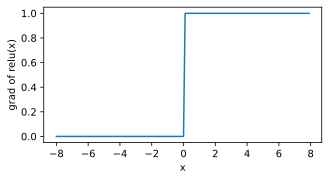

In [2]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

### 3.8.2.2 sigmoid函数
$$sigmoid(x)=\frac{1}{1+exp(-x)}.$$

当输入接近于0时，sigmoid函数接近线性变换

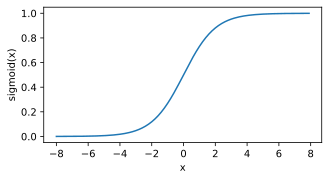

In [3]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

依据链式法则，sigmoid函数的导数：
$$sigmoid'(x)=sigmoid(x)(1-sigmoid(x)).$$

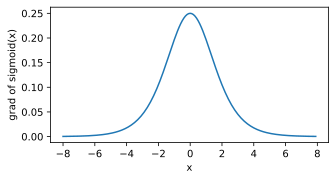

In [4]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

### 3.8.2.3 tanh函数
tanh（双曲正切）函数可以将元素的值变换到-1到1之间$$$$
$$tanh(x)=\frac{1-exp(-2x)}{1+exp(-2x)}.$$
$$$$
当输入接近于0时，tanh函数接近线性变换，与sigmoid函数不同的是，tanh函数在坐标系的原点上对称。

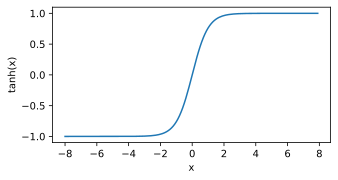

In [5]:
y = x.tanh()
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数$$$$
$$tanh'(x)=1-tanh^2(x)$$
$$$$
当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0

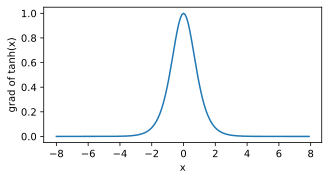

In [6]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

## 3.8.3 多层感知机
多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。多层感知机按以下方式计算输出：
$$$$
$$H=\phi(XW_h+b_h)，\\
O=HW_o+b_o$$
$$$$
在分类问题中，我们可以对输出$O$做softmax运算，并使用softmax回归中的交叉熵损失函数。 在回归问题中，我们将输出层的输出个数设为1，并将输出$O$直接提供给线性回归中使用的平方损失函数。